# Analisi sulla Popolazione Italiana
### Descrizione:
Con la seguente relazione voglio mostrare l'andamento della popolazione Italiana, analizzando database ufficiali nazionali e internazionali.<br>
L'analisi prende in esame i dati del periodo dal 2019 al 2022.

In [2]:
##INSTALLING LIBRARIES
#Commented to save some execution time
#pip install numpy pandas plotly matplotlib pyarrow

In [3]:
##SETUP
#Import libraries
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

#Read and store every DB
cf = pd.read_csv("./dataset/CF_popolazione_eta.csv",encoding="utf-8",delimiter=",")
df = pd.read_csv("./dataset/DF_indicatori_demografici.csv", encoding="utf-8",delimiter=",")
ff = pd.read_csv("./dataset/FF_fertilità_mondiale.csv", encoding="utf-8",delimiter=",")
gf = pd.read_csv("./dataset/GF_urbanizzazione_mondiale.csv", encoding="utf-8",delimiter=",")
sf = pd.read_csv("./dataset/SF_popolazione_residente.csv", encoding="utf-8",delimiter=",")

### Primo Grafico: Popolazione del 1° Gennaio e del 31° Dicembre
Nel seguente grafico vediamo la popolazione Italiana censita il 1° Gennaio e il 31° Dicembre.<br>
Il censimento del 1° Gennaio 2019 riporta la popolazione a circa 60 milioni, l'andamento è rimasto negativo per tutto il periodo, il 31 Dicembre 2022 la popolazione è diminuita di circa 1 milione, portando la popolazione Italiana ad un totale di circa 59 milioni.<br>
Un salto importante nella popolazione lo si può notare nel 2020, dove per via della pandemia COVID-19 si sono registrate innumerevoli morti

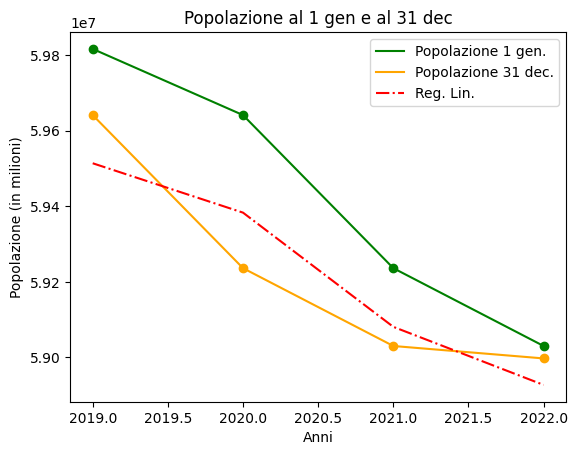

In [4]:
##GRAPH: POPULATION 1 JAN AND 31 DEC
#Selection of columns
years = sf['Periodo']
value = sf['popolazione censita al 1° gennaio']
value2 = sf['popolazione censita al 31 dicembre']
pred = np.array([0,0,0,0])

#Calculation of the average
meanx = np.mean(value)
meany = np.mean(value2)

#Calculation of coeff and intercept
coeff = np.sum((value-meanx)*(value2-meany))/np.sum((value-meanx)**2)
inter = meany-coeff*meanx

#Calculation of the reg. line
for i in range(0,len(sf)):
    pred[i] = inter+(coeff*value[i])

#Creation of the graph
plt.plot(years,value,color='green',label="Popolazione 1 gen.")
plt.scatter(years, value, color="green")
plt.plot(years,value2,color='orange',label="Popolazione 31 dec.")
plt.scatter(years, value2, color="orange")
plt.plot(years, pred, color='red', linewidth=1.5, label='Reg. Lin.', linestyle = 'dashdot')
plt.xlabel('Anni')
plt.ylabel('Popolazione (in milioni)')
plt.title('Popolazione al 1 gen e al 31 dec')
plt.legend()

#Show the figure
plt.show()

### Secondo Grafico: Tasso di Mortalità e Natalità
In questo grafo possiamo vedere nello specifico l'andamento di natalità e mortalità, come si vede il bilancio è nettamente negativo e nel 2020 la mortalità raddoppia la natalità, portando la popolazione al declino che abbiamo visto nel grafico precedente.<br>
Questa altissima mortalità è dovuta da diversi fattori come:
- Età avanzata della popolazione
- Malattie
- Livelli di Fertilità bassi

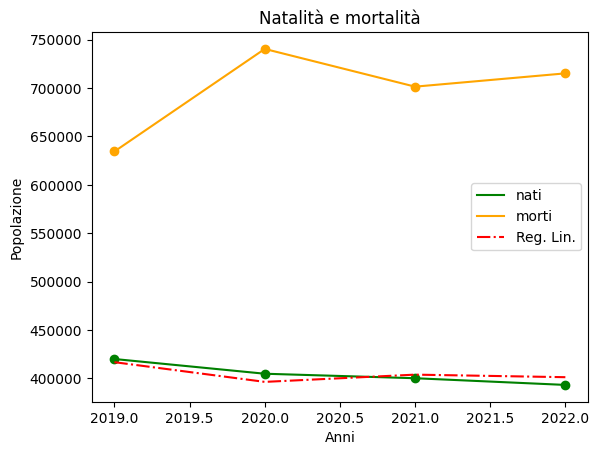

In [5]:
##GRAPH: BIRTH AND DEATH
#Selection of the columns
years = sf['Periodo']
value = sf['nati vivi']
value2 = sf['morti']

#Calculation of the mean
meanx = np.mean(value2)
meany = np.mean(value)

#Calculation of coeff and intercept
coeff = np.sum((value2-meanx)*(value-meany))/np.sum((value2-meanx)**2)
inter = meany-coeff*meanx

#Calculation of the reg. line
for i in range(0,len(years)):
    pred[i] = inter+(coeff*value2[i])

#Creation of the graph
plt.plot(years,value,color='green',label="nati")
plt.scatter(years, value, color="green")
plt.plot(years,value2,color='orange',label="morti")
plt.scatter(years, value2, color="orange")
plt.plot(years, pred, color='red', linewidth=1.5, label='Reg. Lin.', linestyle = 'dashdot')
plt.xlabel('Anni')
plt.ylabel('Popolazione')
plt.title('Natalità e mortalità')
plt.legend()

#Show the figure
plt.show()

### Terzo Grafico: Popolazione divisa in fasce di età
In questi grafici a torta possiamo vedere come negli anni la popolazione non è mai aumentata.
La fascia giovanile (0-14 anni) ha continuato a diminuire costantemente, mentre la fascia adulta (15-64 anni) occupa la maggior parte della popolazione.<br>
La fascia anziana (65+ anni) invece è l'unica che è aumentata di numero, dato l'invecchiare della popolazione, arrivando del 2022 al doppio della fascia giovanile.

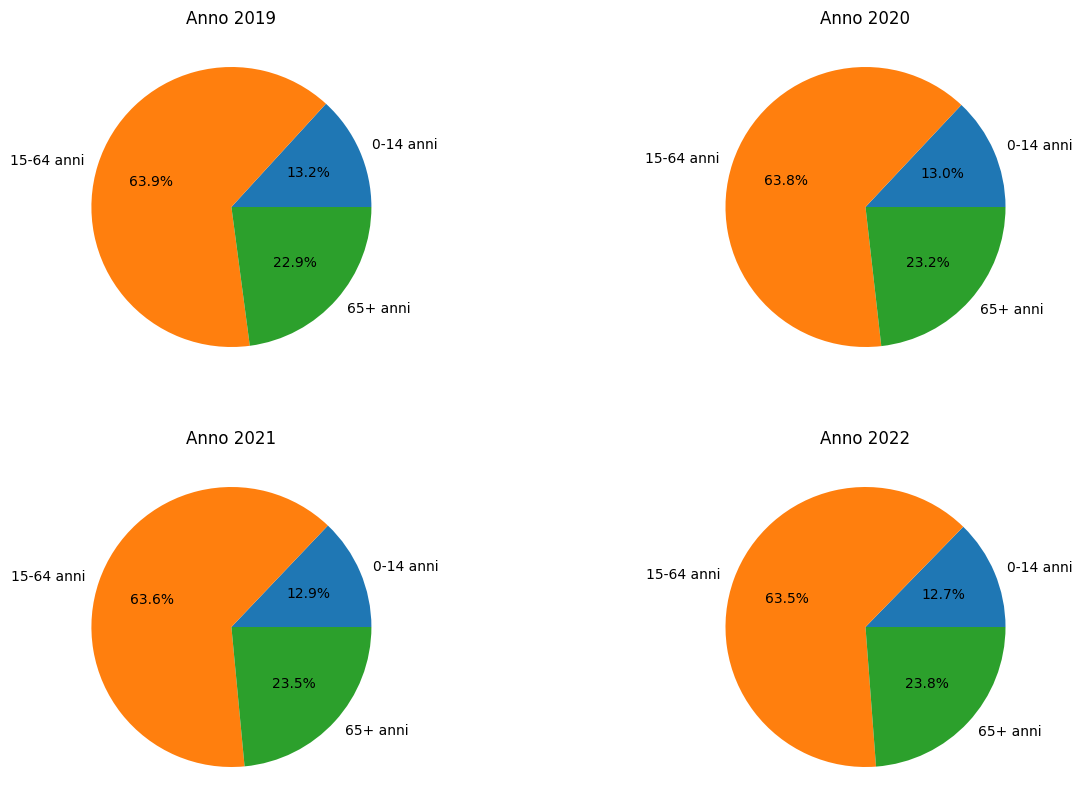

In [6]:
##PIE GRAPH: POPULATION AGE AND MEAN
#Selection of the columns
years = df['Periodo']
col = 'popolazione 0-14 anni al 1° gennaio (valori percentuali) - al 1° gennaio'
col2 = 'popolazione 15-64 anni (valori percentuali) - al 1° gennaio'
col3 = 'popolazione 65 anni e più (valori percentuali) - al 1° gennaio'

#Creation of the figure with four separate pie chart 
fig,axn = plt.subplots(2,2,figsize=(15,10))

#Loop to fill every pie chart
for i in range(2):
    for j in range(2):
        #Selection of the year and right row with year confrontation
        year = years[i*2+j]
        value = df[(df['Periodo'] == year) & (df[col])][col].values[0]
        value2 = df[(df['Periodo'] == year) & (df[col2])][col2].values[0]
        value3 = df[(df['Periodo'] == year) & (df[col3])][col3].values[0]

        #Creation of the array with data and labels
        data = np.array([value,value2,value3])
        labels = np.array(['0-14 anni','15-64 anni','65+ anni'])

        #Creation of the pie chart and the title by selecting the right year
        axn[i, j].pie(data,labels=labels,autopct='%.1f%%')
        axn[i, j].grid()
        axn[i, j].set_title(f'Anno {year}')

#Show the figure
plt.show()

### Quarto Grafico: Piramide dell' età della Popolazione
In questo grafico, oltre a mostrarci la divisione per sessi, possiamo vedere la distribuzione accurata delle età, le età vanno da 0 anni fino a 100 e più anni, come si può già notare la parte intermedia, dai 30 ai 60 anni circa presenta un picco, mostrandoci visivamente la distribuzione del grafico precedente.<br>
Ogni anno inoltre possiamo vedere come piano piano la "punta della piramide" si sposta verso l'età avanzata, questo ci mostra perfettamente del grande problema della popolazione Italiana.<br>
In pochi anni la "punta" raggiungerà la soglia e oltre della fascia anziana, un grande colpo non solo per la popolazione ma anche per il lavoro, la manodopera e soprattutto le pensioni.<br>
Presto lo Stato si troverà in crisi per riuscire a sostenere la fascia anziana, questo grafico quindi ci mostra chiaramente la crisi economica che ben presto andremo in contro.

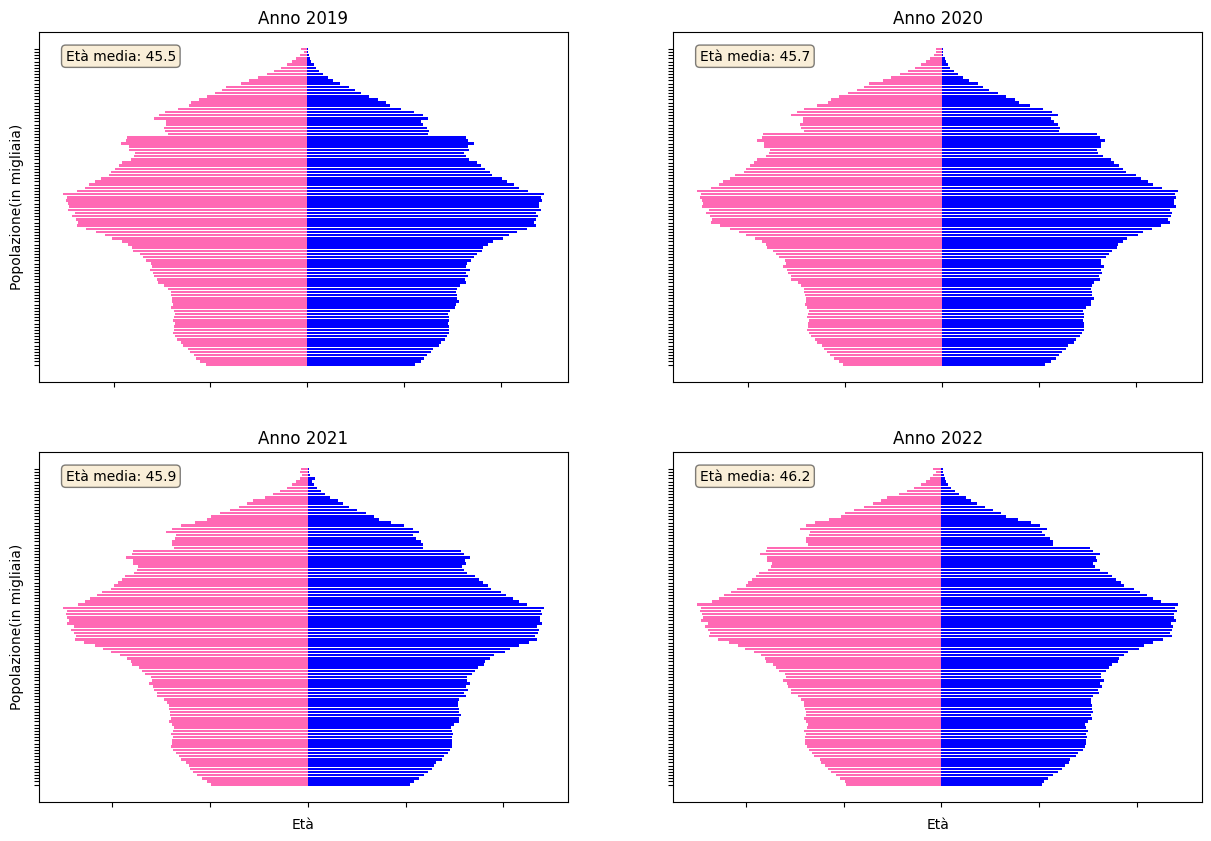

In [7]:
##HISTOGRAM: AGE OF EVERY YEAR
#Selection of years and the columns
col = cf.columns[2:]
years = cf['Periodo']
years = list(set(years)) #Remove duplicate

#Creation of the figure with four separate histogram
fig,axn = plt.subplots(2,2,figsize=(15,10))

#Loop to fill every histogram
for i in range(2):
    for j in range(2):
        #Selection of the year and right row with year confrontation
        year = years[i*2+j]
        year_popm = cf[(cf['Periodo'] == year) & (cf['Sesso'] == 'maschi')][col].values[0]
        year_popf = cf[(cf['Periodo'] == year) & (cf['Sesso'] == 'femmine')][col].values[0] * -1
    

        #Selection from the DB the mean age of that year, convert from pandas DataFrame to Series
        mean = df[df['Periodo'] == year]["età media della popolazione - al 1° gennaio"]
        mean = mean.squeeze()

        #Creation of the textbox for the mean age of that year, props is a dictionary with the details to create the box
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axn[i, j].text(0.05, 0.95, f'Età media: {mean}',transform=axn[i, j].transAxes, fontsize=10, verticalalignment='top', bbox=props)

        #Creation of the histogram and the title by selecting the right year
        axn[i, j].barh(col, year_popf, color="hotpink", label="Femmine",align="center")
        axn[i, j].barh(col, year_popm, color="blue", label="Maschi",align="center")

        axn[i, j].set_title(f'Anno {year}')

#Fix the labels on each histogram and delete the x ticks
for ax in axn.flat:
    ax.set(xlabel='Età', ylabel='Popolazione(in migliaia)')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.label_outer()

#Show the figure
plt.show()

### Quinto Grafico: Tasso di Fertilità e Età media della donna al primo parto
Con questo grafico voglio mostrare la corr

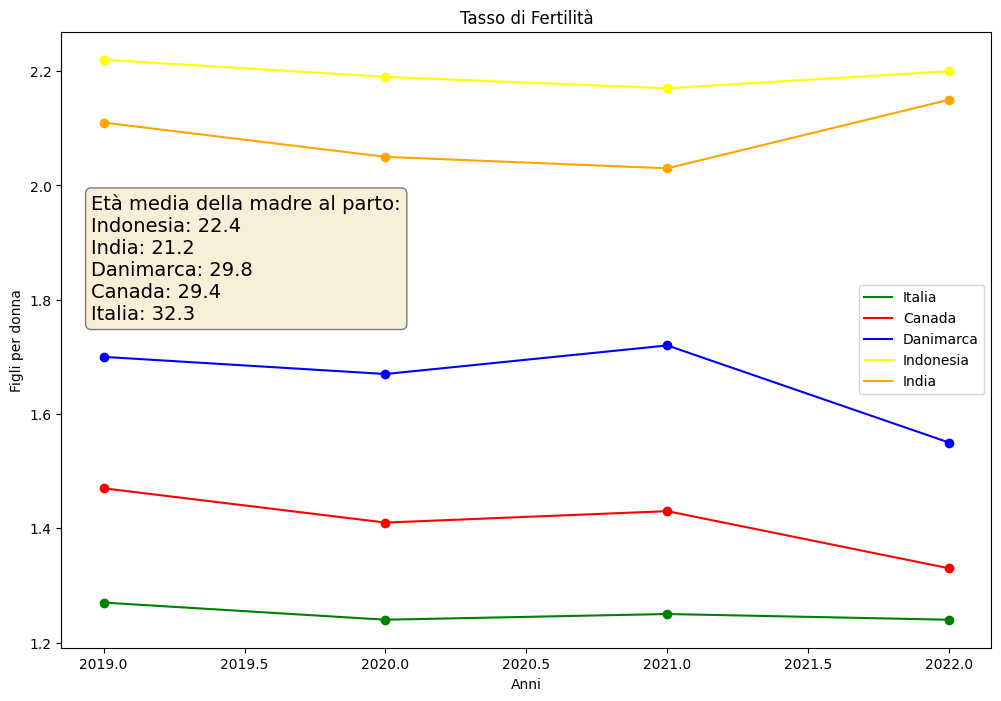

In [8]:
##GRAPH: FERTILITY RATE AND MOTHER'S MEAN AGE OF BIRTH
#Selection of the columns
years = df['Periodo']
valueIT = df['numero medio di figli per donna']
value2IT = np.round(np.mean(df['età media della madre al parto']),1)

#Data estraction from web: Canada
valueCA = np.array([1.47,1.41,1.43,1.33])
value2CA = np.round(29.4,1)

#Data estraction from web: Denmark
valueDE = np.array([1.70,1.67,1.72,1.55])
value2DE = np.round(29.8,1)

#Data estraction from web: Indonesia
valueIN = np.array([2.22,2.19,2.17,2.2])
value2IN = np.round(22.4,1)

#Data estraction from web: India
valueIND = np.array([2.11,2.05,2.03,2.15])
value2IND = np.round(21.2,1)

#Text box specifications
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#Creation of the graph
plt.figure(figsize=(12,8))

#Creation of the Italian line
plt.plot(years,valueIT,color='green',label="Italia")
plt.scatter(years, valueIT, color="green")

#Creation of the Canadian line
plt.plot(years,valueCA,color='red',label="Canada")
plt.scatter(years, valueCA, color="red")

#Creation of the Danish line
plt.plot(years,valueDE,color='blue',label="Danimarca")
plt.scatter(years, valueDE, color="blue")

#Creation of the Indonesian line
plt.plot(years,valueIN,color='yellow',label="Indonesia")
plt.scatter(years, valueIN, color="yellow")

#Creation of the Indian line
plt.plot(years,valueIND,color='orange',label="India")
plt.scatter(years, valueIND, color="orange")

#Creation of the textbox with the mean age of the mom at the birth
text = f"Età media della madre al parto:\nIndonesia: {value2IN}\nIndia: {value2IND}\nDanimarca: {value2DE}\nCanada: {value2CA}\nItalia: {value2IT}"
plt.text(0.15, 0.52, text, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Creation of labels and title
plt.xlabel('Anni')
plt.ylabel('Figli per donna')
plt.title('Tasso di Fertilità')
plt.legend()

#Show the figure
plt.show()

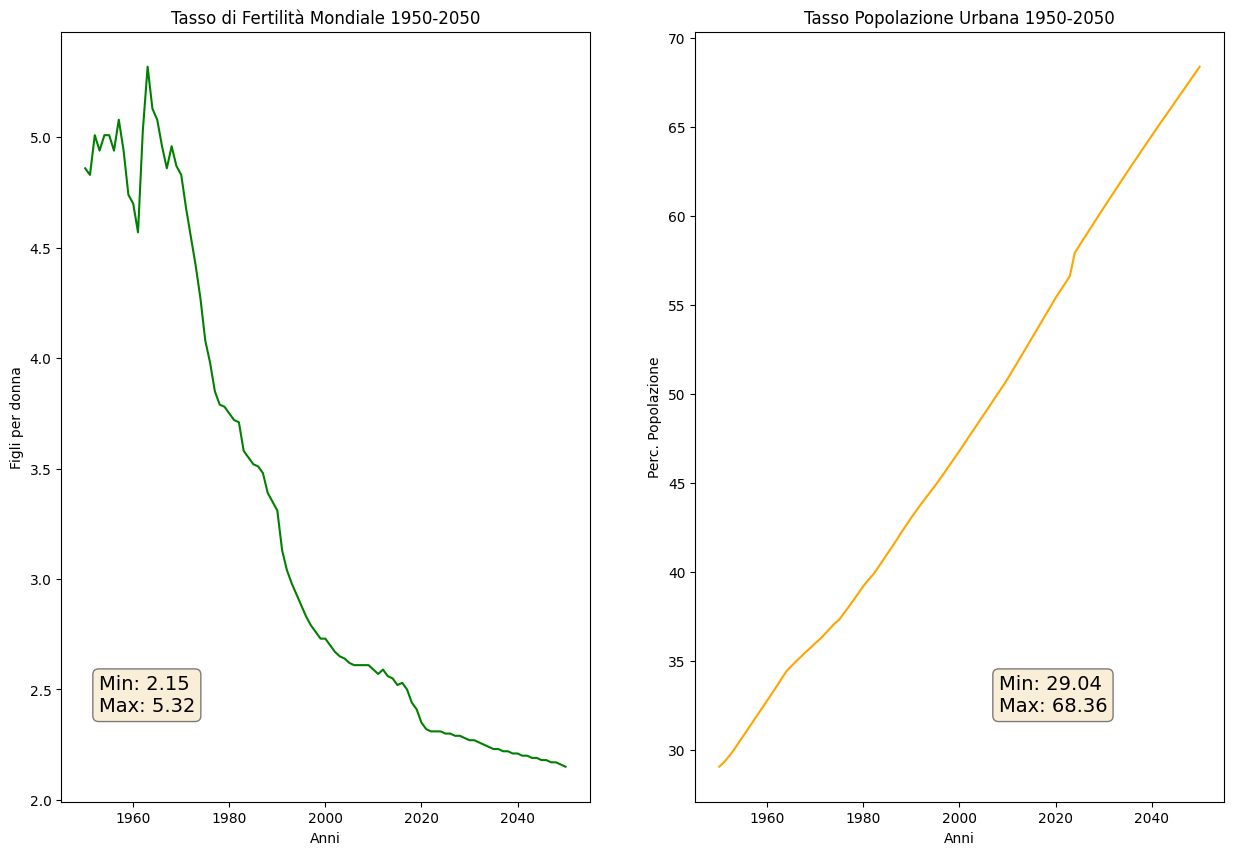

In [9]:
##GRAPH: WORLD FERTILITY RATE WITH PROJECTIONS AND WORLD URBANIZATION
#Selection of the columns
years = ff[ff["Year"] <= 2050]["Year"]
value = ff[ff["Year"] <= 2050]["Total Fertility Rate"]
text= f"Min: {min(value)}\nMax: {max(value)}"
value2 = round(gf[(gf['Entity'] == 'World') & (gf['Year'] >= 1950)]["Share of population residing in urban areas (HYDE estimates and UN projections)"],2)
text2= f"Min: {min(value2)}\nMax: {max(value2)}"

#Creation of the two Graphs
fig,axn = plt.subplots(1,2,figsize=(15,10))

#Creation of the Graph Fertility Rate
axn[0].plot(years,value,color='green',label="Tasso Fert.")
axn[0].set(xlabel='Anni',ylabel='Figli per donna')
axn[0].set_title('Tasso di Fertilità Mondiale 1950-2050')
axn[0].text(0.15, 0.2, text, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Creation of the Graph Urbanization
axn[1].plot(years,value2,color='orange',label="Tasso Fert.")
axn[1].set(xlabel='Anni',ylabel='Perc. Popolazione')
axn[1].set_title('Tasso Popolazione Urbana 1950-2050')
axn[1].text(0.75, 0.2, text2, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Show the graph
plt.show()